In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score

from sklearn.preprocessing import StandardScaler
import obtain as ob

## Obtain

In [2]:
poverty_df = ob.upload_county_acs_data('ACSDP5Y2012.DP03_data_with_overlays_2019-12-31T163946.csv')
df = poverty_df
population_df = ob.upload_county_acs_data('ACSDP5Y2012.DP05_data_with_overlays_2019-12-31T193014.csv')
df = ob.merge_acs_data(df,population_df)
df = ob.remove_duplicate_countystate(df) 


In [3]:

clean2, object_df = ob.separate_num_columns(df)
#clean = clean.drop(columns= ['ratio_to_max_payment', '_Average_Total_Payments_'])
scaler = StandardScaler()
scaled_df = scaler.fit_transform(clean2)




In [4]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 

    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 969.6798498217172, 'Cluster': 2}
{'Score': 834.5042498141972, 'Cluster': 3}
{'Score': 745.289271103537, 'Cluster': 4}
{'Score': 717.4500496274605, 'Cluster': 5}
{'Score': 659.1736822928193, 'Cluster': 6}
{'Score': 605.7563035217526, 'Cluster': 7}
{'Score': 565.2842067952568, 'Cluster': 8}
{'Score': 537.4067750022916, 'Cluster': 9}
{'Score': 500.2523821770131, 'Cluster': 10}
{'Score': 476.3088588314726, 'Cluster': 11}
{'Score': 449.8934979542051, 'Cluster': 12}
{'Score': 417.4528977810176, 'Cluster': 13}
{'Score': 404.61327795482157, 'Cluster': 14}
{'Score': 392.924245473238, 'Cluster': 15}
{'Score': 385.2805193214281, 'Cluster': 16}
{'Score': 366.333932540082, 'Cluster': 17}
{'Score': 358.4354746619541, 'Cluster': 18}
{'Score': 348.2840971598103, 'Cluster': 19}
{'Score': 336.17700633988113, 'Cluster': 20}
{'Score': 322.603052421611, 'Cluster': 21}
{'Score': 310.1865610741892, 'Cluster': 22}
{'Score': 305.97310057431355, 'Cluster': 23}
{'Score': 297.91392168012015, 'Cluster': 

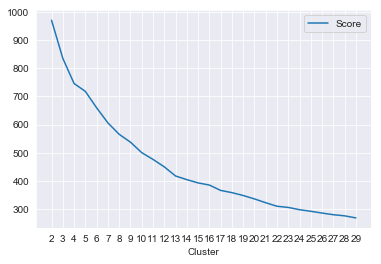

In [5]:
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot()
plt.xticks(range(2,30))
plt.show()

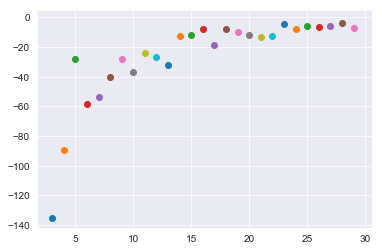

In [6]:
last = calinski_harabasz_list[0]['Score']
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    last = i['Score']

In [7]:
cms_df = ob.cms_data()
provider_index = cms_df.Provider_Id.value_counts().loc[cms_df.Provider_Id.value_counts()>= 50].index
cms_df = cms_df.loc[cms_df.Provider_Id.apply(lambda x: x in provider_index)]

In [9]:
label_df = ob.cms_procedure_dummy_labels(cms_df)
for i in label_df.columns:
    label_df[i] = label_df[i]* cms_df.ratio_to_max_payment
label_df['Provider_Id'] = cms_df['Provider_Id']
label_df = label_df.groupby('Provider_Id').max()

In [10]:
num_df, object_df = ob.separate_num_columns(label_df)
clean = num_df

scaler = StandardScaler()
scaled_df = scaler.fit_transform(clean)

In [11]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 

    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 616.8904220380089, 'Cluster': 2}
{'Score': 442.9960032423296, 'Cluster': 3}
{'Score': 344.753918405462, 'Cluster': 4}
{'Score': 283.9676794095838, 'Cluster': 5}
{'Score': 247.4649780918856, 'Cluster': 6}
{'Score': 220.21429066917304, 'Cluster': 7}
{'Score': 196.44715043159553, 'Cluster': 8}
{'Score': 178.43562049428022, 'Cluster': 9}
{'Score': 164.05320218357744, 'Cluster': 10}
{'Score': 152.2587646196595, 'Cluster': 11}
{'Score': 141.8775182912298, 'Cluster': 12}
{'Score': 132.70885363811252, 'Cluster': 13}
{'Score': 124.37693876750758, 'Cluster': 14}
{'Score': 117.6585728951809, 'Cluster': 15}
{'Score': 111.12633404363362, 'Cluster': 16}
{'Score': 105.27459640849922, 'Cluster': 17}
{'Score': 100.78467153790547, 'Cluster': 18}
{'Score': 96.73835530436904, 'Cluster': 19}
{'Score': 92.63149459027237, 'Cluster': 20}
{'Score': 88.49813925775219, 'Cluster': 21}
{'Score': 85.71598865819783, 'Cluster': 22}
{'Score': 82.97865046876312, 'Cluster': 23}
{'Score': 79.29576479433013, 'Cl

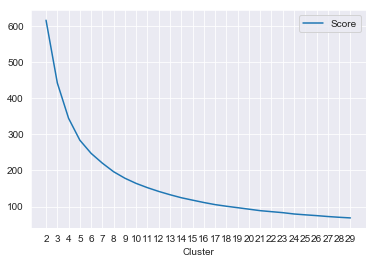

In [12]:
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot()
plt.xticks(range(2,30))
plt.show()

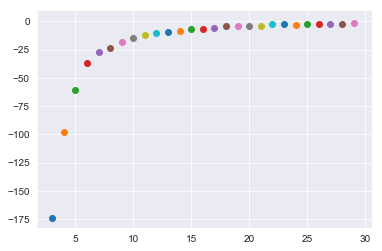

In [13]:
last = calinski_harabasz_list[0]['Score']
velocity =[0]
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    velocity.append(i['Score']- last)
    last = i['Score']


In [14]:
df = cms_df.merge(df.drop(columns =['County','State']), how='left', on=['CountyState'])
print(len(df))
label_df = df.groupby('Provider_Id').mean()
num_df, object_df = ob.separate_num_columns(label_df)
clean1 = num_df
print(len(num_df))
scaler = StandardScaler()
scaled_df = scaler.fit_transform(clean1)

125284
1618


In [15]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 
 
    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 651.2475491111336, 'Cluster': 2}
{'Score': 501.45320417108536, 'Cluster': 3}
{'Score': 455.7612772662894, 'Cluster': 4}
{'Score': 382.20505725776627, 'Cluster': 5}
{'Score': 335.8789133945843, 'Cluster': 6}
{'Score': 300.92932960164654, 'Cluster': 7}
{'Score': 276.5549271440688, 'Cluster': 8}
{'Score': 260.0585218505765, 'Cluster': 9}
{'Score': 238.96339482697036, 'Cluster': 10}
{'Score': 223.80992185331692, 'Cluster': 11}
{'Score': 215.23814552681523, 'Cluster': 12}
{'Score': 201.4503980918278, 'Cluster': 13}
{'Score': 194.0174696085525, 'Cluster': 14}
{'Score': 184.63004278206742, 'Cluster': 15}
{'Score': 176.96394295025988, 'Cluster': 16}
{'Score': 170.39113287527505, 'Cluster': 17}
{'Score': 164.28031060151224, 'Cluster': 18}
{'Score': 158.70955443521976, 'Cluster': 19}
{'Score': 153.1244657835986, 'Cluster': 20}
{'Score': 151.54760503992728, 'Cluster': 21}
{'Score': 146.8970934633369, 'Cluster': 22}
{'Score': 141.5062077263723, 'Cluster': 23}
{'Score': 138.98835713625263

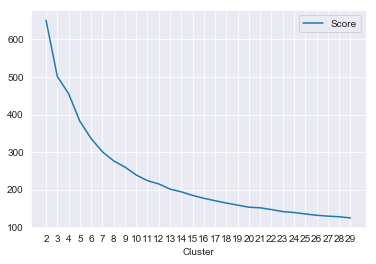

In [16]:
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot()
plt.xticks(range(2,30))
plt.show()

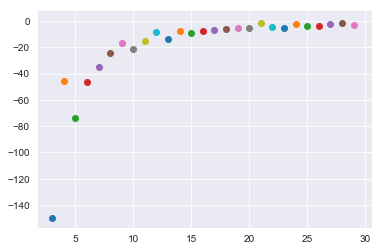

In [17]:
last = calinski_harabasz_list[0]['Score']
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    last = i['Score']

In [18]:
from sklearn.decomposition import PCA
pca= PCA()
scaled_df = pca.fit_transform(scaled_df)

In [19]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 
 
    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 651.2475491111348, 'Cluster': 2}
{'Score': 501.45320417108627, 'Cluster': 3}
{'Score': 455.76127726629, 'Cluster': 4}
{'Score': 382.2050572577668, 'Cluster': 5}
{'Score': 333.4410783752612, 'Cluster': 6}
{'Score': 304.3661424771428, 'Cluster': 7}
{'Score': 277.47126689644085, 'Cluster': 8}
{'Score': 255.7942218393934, 'Cluster': 9}
{'Score': 236.9885111617386, 'Cluster': 10}
{'Score': 225.52617216027403, 'Cluster': 11}
{'Score': 210.6416327687689, 'Cluster': 12}
{'Score': 203.97742610532023, 'Cluster': 13}
{'Score': 192.18722027450414, 'Cluster': 14}
{'Score': 183.6729699254451, 'Cluster': 15}
{'Score': 177.02643293435594, 'Cluster': 16}
{'Score': 169.523658134085, 'Cluster': 17}
{'Score': 164.05185980516742, 'Cluster': 18}
{'Score': 157.86341863946456, 'Cluster': 19}
{'Score': 156.97714254777475, 'Cluster': 20}
{'Score': 150.5845279187256, 'Cluster': 21}
{'Score': 145.20968328317812, 'Cluster': 22}
{'Score': 142.39604589090106, 'Cluster': 23}
{'Score': 137.90039666895325, 'C

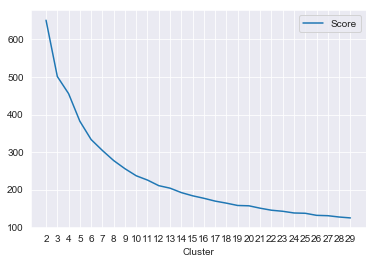

In [20]:
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot()
plt.xticks(range(2,30))
plt.show()

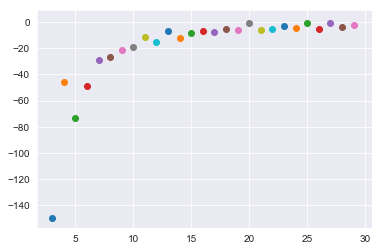

In [21]:
last = calinski_harabasz_list[0]['Score']
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    last = i['Score']

In [22]:
k_means = KMeans(n_clusters=4)

# Run the clustering algorithm
k_means.fit(scaled_df) 

# Generate cluster index values for each row
cluster_assignments = k_means.predict(scaled_df)
sho= label_df
sho['Cluster'] = cluster_assignments


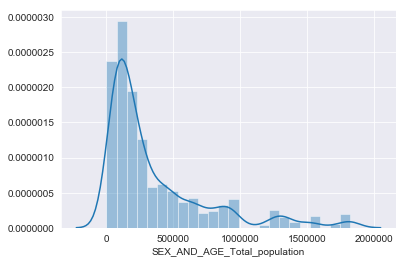

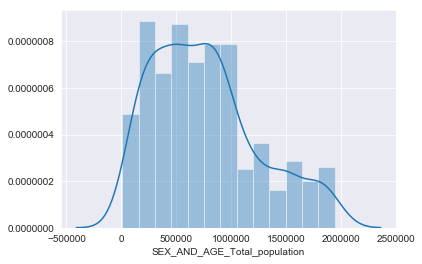

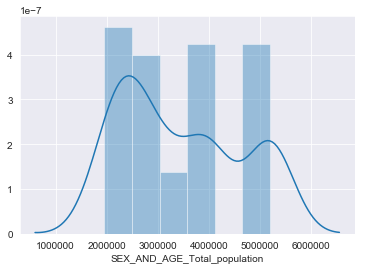

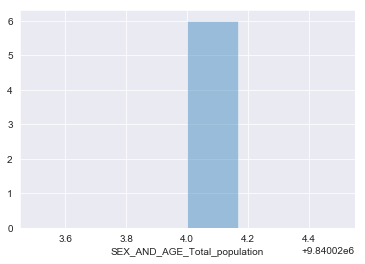

In [23]:
for i in sho['Cluster'].unique():
    sns.distplot(sho.loc[sho['Cluster'] == i]['SEX_AND_AGE_Total_population'])
    
    plt.show()

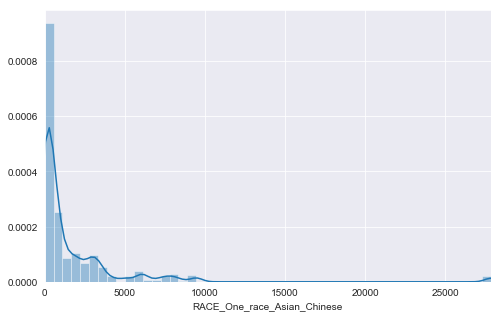

502.0


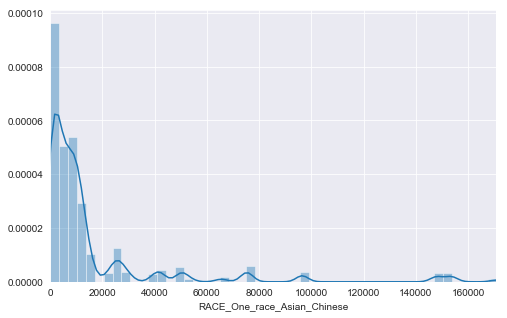

6555.0


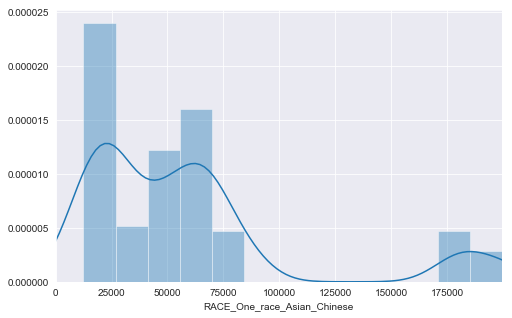

46604.0


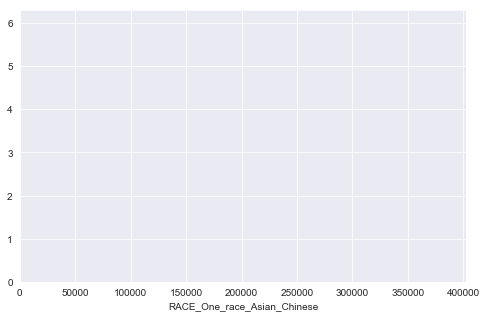

402562.0


In [24]:
for i in sho['Cluster'].unique():
    plt.figure(figsize=(8,5))
    sns.distplot(sho.loc[sho['Cluster'] == i]['RACE_One_race_Asian_Chinese'])
    plt.xlim(0,sho.loc[sho['Cluster'] == i]['RACE_One_race_Asian_Chinese'].max())
    plt.show()
    print(sho.loc[sho['Cluster'] == i]['RACE_One_race_Asian_Chinese'].median())

In [25]:
show2 =df
show2['Cluster'] = df.Provider_Id.apply(lambda x: sho['Cluster'][x])

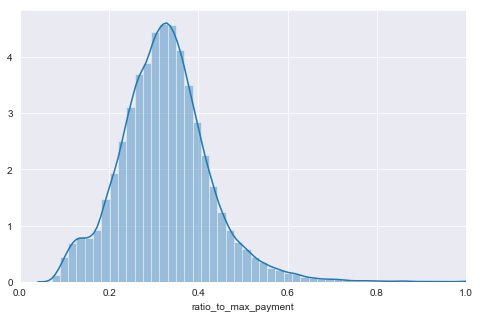

0.3215918704062379


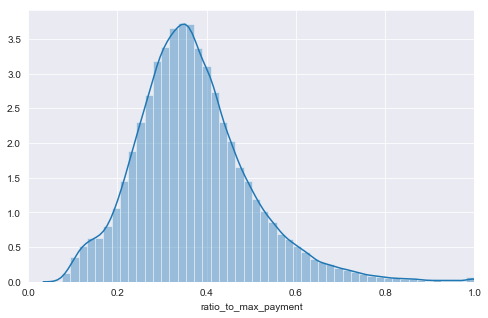

0.3566631981069081


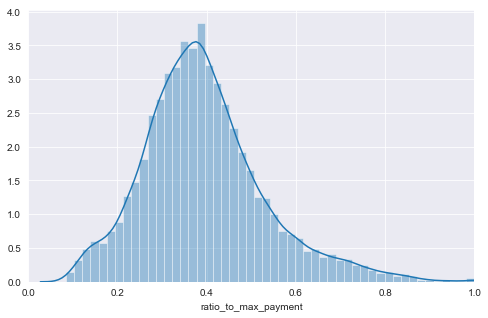

0.3800127668699641


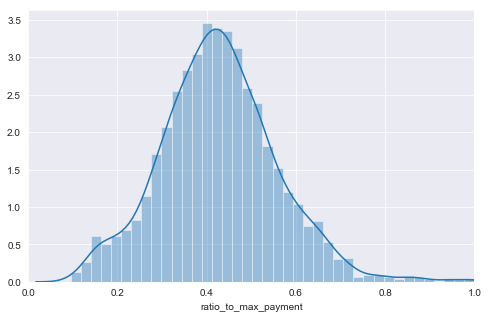

0.42292496665322715


In [26]:
column= 'ratio_to_max_payment'
for i in show2['Cluster'].unique():
    plt.figure(figsize=(8,5))
    sns.distplot(show2.loc[show2['Cluster'] == i][column])
    plt.xlim(0,show2.loc[show2['Cluster'] == i][column].max())
    plt.show()
    print(show2.loc[show2['Cluster'] == i][column].median())